# 02 - Frames exploration¶
We calculate words' frequency per frame and PMI

In [1]:
import pandas as pd
import numpy as np
import pickle 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords  
from os.path import join, exists
from IPython.display import clear_output
from auxiliar_functions import process_folds, build_report, load_dataset, predict_deep, load_embedding
from collections import Counter
clear_output()

In [2]:
# Load the dataset
df = load_dataset("preprocess_dataset.npy")

# Explore the dataset
df.head()

,original_text,preprocess_text,encoded,frames,conflicto,economico,humanidad,moral
0,Japón registró un nuevo déficit comercial réco...,japón registró un nuevo déficit comercial réco...,"[8759, 8914, 9989, 9898, 6584, 8773, 8428, 999...","[0, 1, 0, 0]",0,1,0,0
1,"UDI acusa ""mala memoria"" de la Nueva Mayoría f...",udi acusa mala memoria de la nueva mayoría fre...,"[9610, 8486, 8448, 7205, 10001, 9999, 9927, 97...","[1, 0, 0, 1]",1,0,0,1
2,La misteriosa oferta por Esteban Paredes que i...,la misteriosa oferta por esteban paredes que [...,"[9999, 1121, 8346, 9990, 8487, 8596, 9996, 1, ...","[1, 0, 0, 0]",1,0,0,0
3,La familia maratón que causó revuelo en Holand...,la familia maratón que causó revuelo en holand...,"[9999, 9668, 5417, 9996, 7388, 2016, 9997, 887...","[0, 0, 1, 0]",0,0,1,0
4,Crean sitio web que recopila mangas descontin...,crean sitio web que [UNK] [UNK] [UNK] para [UN...,"[2420, 9319, 9360, 9996, 1, 1, 1, 9985, 1, 998...","[0, 1, 0, 0]",0,1,0,0


In [3]:
# List of frames
frames = ['Conflict', 'Economy', 'Human-Interest', 'Morality']

In [4]:
# Calculate the total number of frames
for i in range(len(frames)):
    df[frames[i]] = df.frames.map(lambda x: x[i])

df["total"] = df.frames.map(lambda x: sum(x))
    
df.head()

,original_text,preprocess_text,encoded,frames,conflicto,economico,humanidad,moral,Conflict,Economy,Human-Interest,Morality,total
0,Japón registró un nuevo déficit comercial réco...,japón registró un nuevo déficit comercial réco...,"[8759, 8914, 9989, 9898, 6584, 8773, 8428, 999...","[0, 1, 0, 0]",0,1,0,0,0,1,0,0,1
1,"UDI acusa ""mala memoria"" de la Nueva Mayoría f...",udi acusa mala memoria de la nueva mayoría fre...,"[9610, 8486, 8448, 7205, 10001, 9999, 9927, 97...","[1, 0, 0, 1]",1,0,0,1,1,0,0,1,2
2,La misteriosa oferta por Esteban Paredes que i...,la misteriosa oferta por esteban paredes que [...,"[9999, 1121, 8346, 9990, 8487, 8596, 9996, 1, ...","[1, 0, 0, 0]",1,0,0,0,1,0,0,0,1
3,La familia maratón que causó revuelo en Holand...,la familia maratón que causó revuelo en holand...,"[9999, 9668, 5417, 9996, 7388, 2016, 9997, 887...","[0, 0, 1, 0]",0,0,1,0,0,0,1,0,1
4,Crean sitio web que recopila mangas descontin...,crean sitio web que [UNK] [UNK] [UNK] para [UN...,"[2420, 9319, 9360, 9996, 1, 1, 1, 9985, 1, 998...","[0, 1, 0, 0]",0,1,0,0,0,1,0,0,1


In [5]:
# Get Spanish stopwords
spanish_stopwords = set(stopwords.words('spanish') + ["[UNK]", "[NUM]"])

In [6]:
# Filter stopwords
def filter(dataset, frame_filter):
    results = []
    for _, row in dataset.iterrows():
        result = True
        for i in range(len(frame_filter)):
            if frame_filter[i] == None:
                continue
                
            if frame_filter[i] != row.frames[i]:
                result = False
        results.append(result)
    return results

In [7]:
# Get the most N frequent words in the dataset
def get_most_frecuent(dataset, N, silent=False):
    top_words = {}
    
    values = [[1, None, None, None],
              [None, 1, None, None],
              [None, None, 1, None],
              [None, None, None, 1]]
    
    for value in values:
        word_list = []

        for i, x in dataset[filter(dataset, value)].iterrows():
            text = x.preprocess_text.split()
            for word in text:
                if word not in spanish_stopwords:
                    word_list.append(word)

        aux = []
        for i in range(len(value)):
            if value[i] == 1:
                aux.append(frames[i])

        if len(aux) == 0:
            aux = ("ninguno", )

        counter = Counter(word_list)
        words = [x for x in counter.most_common(N)]
        top_words[(tuple(aux))] = words
                
        if not silent:
            print(aux)
            print(words)
            print()
        
    return top_words

In [8]:
frecuents_words = get_most_frecuent(df, 20)

['Conflict']
[('gobierno', 1277), ('chile', 943), ('presidente', 811), ('dijo', 803), ('país', 773), ('si', 764), ('tras', 718), ('ser', 660), ('según', 653), ('dos', 615), ('ex', 605), ('parte', 602), ('ministro', 584), ('horas', 561), ('hoy', 505), ('nacional', 504), ('además', 482), ('personas', 475), ('caso', 473), ('nueva', 470)]

['Economy']
[('millones', 866), ('chile', 387), ('según', 366), ('horas', 361), ('país', 349), ('mil', 343), ('si', 329), ('gobierno', 323), ('us', 323), ('dijo', 303), ('además', 298), ('dos', 294), ('dólares', 291), ('presidente', 251), ('parte', 250), ('pesos', 249), ('santiago', 242), ('ser', 239), ('tras', 233), ('ver', 230)]

['Human-Interest']
[('chile', 962), ('tras', 956), ('dos', 841), ('gobierno', 837), ('ser', 818), ('si', 797), ('dijo', 786), ('según', 768), ('país', 719), ('horas', 633), ('personas', 624), ('parte', 616), ('foto', 596), ('presidente', 594), ('además', 568), ('ex', 556), ('ver', 547), ('hoy', 522), ('nueva', 496), ('sido', 4

## Sorting by PMI

PMI gives a higher score to frequent words in a specific topic. 

References
- https://medium.com/dataseries/understanding-pointwise-mutual-information-in-nlp-e4ef75ecb57a
- https://towardsdatascience.com/feature-scoring-metrics-in-word-document-matrix-eb35b38c029e
- https://www.pewresearch.org/decoded/2022/07/13/analyzing-text-for-distinctive-terms-using-pointwise-mutual-information/ 

In [9]:
def get_by_pmi(dataset, N, silent=False):
    word_list = []
    
    top_words = {}

    for i, x in dataset.iterrows():
        text = x.preprocess_text.split()
        for word in text:
            if word not in spanish_stopwords:
                word_list.append(word)

    counter_words = Counter(word_list)
    counter_words = {x: count for x, count in counter_words.items() if count > 0}
    total_words = sum(counter_words.values())

    values = [[1, None, None, None],
              [None, 1, None, None],
              [None, None, 1, None],
              [None, None, None, 1],]
        
    for value in values:
        word_list_frame = []

        for i, x in dataset[filter(dataset, value)].iterrows():
            text = x.preprocess_text.split()
            for word in text:
                if word not in spanish_stopwords:
                    word_list_frame.append(word)

        frames_words_counter = Counter(word_list_frame)
        frames_words_counter = {x: count for x, count in frames_words_counter.items() if count > 0}

        total_frames_words = sum(frames_words_counter.values())


        results_scored = []
        for word in frames_words_counter:
            num = frames_words_counter[word] / total_words
            den = (counter_words[word] / total_words )   *  (total_frames_words /  total_words)
            results_scored.append( (word, max(np.log2(num/den), 0)) )


        aux = []
        for i in range(len(value)):
            if value[i] == 1:
                aux.append(frames[i])

        if len(aux) == 0:
            aux = ("ninguno", )


        results_scored.sort(key=lambda x: x[1], reverse=True)

        top_words[(tuple(aux))] = [x[0] for x in results_scored[:N]]
            
        if not silent:
            print([x[0] for x in results_scored[:N]])            
            print(aux)
            print()
        
    return top_words


In [10]:
top_words = get_by_pmi(df, 20)

['capitanich', 'retórica', 'reconozca', 'mezquitas', 'incompetencia', 'conformación', 'ideológico', 'corina', 'opositoras', 'griesa', 'comisionada', 'pillay', 'milicianos', 'enclave', 'klaveren', 'conadi', 'delimitación', 'lamentando', 'machi', 'jurista']
['Conflict']

['octanos', 'balanza', 'yenes', 'griesa', 'tenedores', 'acreedores', 'endeudamiento', 'divisa', 'landerretche', 'boss', 'gasolinas', 'econsult', 'bencinas', 'dólar', 'default', 'importaciones', 'corredora', 'economías', 'comprador', 'fed']
['Economy']

['contrajo', 'conductora', 'mccartney', 'yoga', 'llorando', 'info', 'monica', 'videoclip', 'reginato', 'gota', 'venezolanas', 'escritores', 'emblemática', 'protagónico', 'reinas', 'spiegel', 'insultos', 'odesur', 'chavista', 'tonka']
['Human-Interest']

['católicos', 'pillay', 'legalizar', 'foley', 'mujica', 'comisionada', 'melissa', 'musulmanes', 'aburman', 'asentamientos', 'impunidad', 'munición', 'conductas', 'concejo', 'condenable', 'insultos', 'corina', 'harboe', 'ado

In [11]:
# Get the most N frequent words in the dataset
def get_words_distribution(dataset):
    top_words = {}
    
    values = [[1, None, None, None],
              [None, 1, None, None],
              [None, None, 1, None],
              [None, None, None, 1]]
    
    for value in values:
        word_list = []

        for i, x in dataset[filter(dataset, value)].iterrows():
            text = x.preprocess_text.split()
            for word in text:
                if word not in spanish_stopwords:
                    word_list.append(word)

        aux = []
        for i in range(len(value)):
            if value[i] == 1:
                aux.append(frames[i])

        if len(aux) == 0:
            aux = ("ninguno", )

        counter = Counter(word_list)
        words = counter.most_common()
        top_words[(tuple(aux))] = words
        
    return top_words

In [12]:
words_per_frame = get_words_distribution(df)

In [13]:
words_df = pd.DataFrame()
for k, w in words_per_frame.items():
    w_df = pd.DataFrame(w, columns=['word', 'value'])
    w_df['frame'] = k[0]
    words_df = pd.concat([words_df, w_df])
    words_df = words_df.reset_index(drop=True)
words_df

,word,value,frame
0,gobierno,1277,Conflict
1,chile,943,Conflict
2,presidente,811,Conflict
3,dijo,803,Conflict
4,país,773,Conflict
...,...,...,...
37053,stone,1,Morality
37054,aspirantes,1,Morality
37055,trío,1,Morality
37056,sello,1,Morality


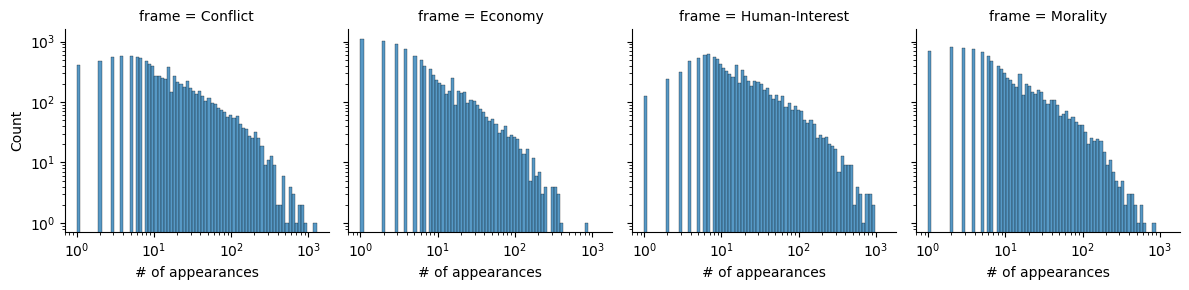

In [14]:
g = sns.displot(
    words_df, x="value", col="frame", log_scale = (True,True),
    height=3, facet_kws=dict(margin_titles=True),
)
g.set_xlabels('# of appearances')
plt.savefig('plots/word_distribution_per_frame.svg', format='svg')
plt.show()

In [15]:
words_df.frame.value_counts()

Human-Interest    9725
Conflict          9505
Morality          9147
Economy           8681
Name: frame, dtype: int64